<a href="https://colab.research.google.com/github/Bookanakere/Explore_FastAI/blob/main/yoga_pose_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook

     |████████████████████████████████| 727kB 27.0MB/s 
     |████████████████████████████████| 1.2MB 50.0MB/s 
     |████████████████████████████████| 194kB 55.5MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 61kB 9.9MB/s 
     |████████████████████████████████| 61kB 10.8MB/s 


In [2]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [4]:
key = os.environ.get('AZURE_SEARCH_KEY', 'INSERT_YOUR_KEY_HERE')

In [5]:
pose_types = 'tree', 'wheel', 'cobra'
path = Path('poses')

In [6]:
if not path.exists():
    path.mkdir()
    for o in pose_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'yoga {o} pose')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [7]:
fns=get_image_files(path)

In [8]:
failed=verify_images(fns)

In [9]:
failed

(#28) [Path('poses/tree/00000094.jpg'),Path('poses/tree/00000086.jpg'),Path('poses/tree/00000117.jpg'),Path('poses/tree/00000142.jpg'),Path('poses/tree/00000145.jpg'),Path('poses/tree/00000101.jpg'),Path('poses/tree/00000148.jpg'),Path('poses/tree/00000123.jpg'),Path('poses/tree/00000021.jpg'),Path('poses/tree/00000083.jpg')...]

In [10]:
failed.map(Path.unlink)

(#28) [None,None,None,None,None,None,None,None,None,None...]

In [28]:
poses = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [29]:
poses = poses.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = poses.dataloaders(path)

In [30]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

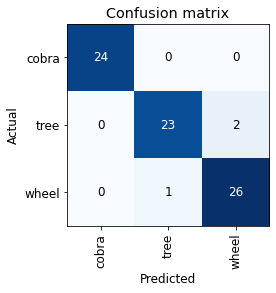

In [31]:
     interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

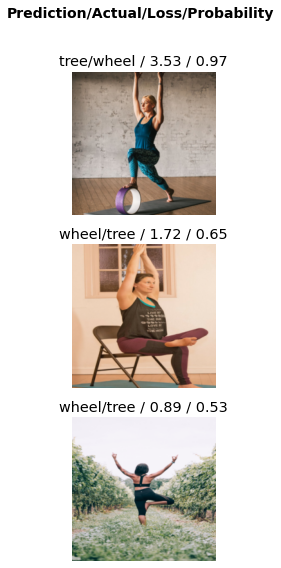

In [32]:
interp.plot_top_losses(3, nrows=3)

In [24]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [ ]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [33]:
learn.export()

In [37]:
learn.predict('images/pose3.jpg')

('wheel', tensor(2), tensor([9.2145e-03, 3.5455e-04, 9.9043e-01]))